<a href="https://colab.research.google.com/github/kkattt51/ArtInt/blob/main/4_%22feature_engineering_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# train_data.loc[train_data.loc[:, 'Alley'].isna(), 'Alley'] = 'Unknown'
train_data.loc[:, 'Alley'].value_counts()

Unknown    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [ ]:
# train_data = train_data.drop(['Alley'], axis=1)
train_data.drop(['Alley'], axis=1, inplace=True)

In [ ]:
is_masvnrna = train_data.loc[:, 'MasVnrType'].isna()
train_data.drop(train_data.loc[is_masvnrna].index, inplace=True)

In [ ]:
train_data.drop(['Id'], axis=1, inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1448 non-null   int64  
 1   MSZoning       1448 non-null   object 
 2   LotFrontage    1194 non-null   float64
 3   LotArea        1448 non-null   int64  
 4   Street         1448 non-null   object 
 5   LotShape       1448 non-null   object 
 6   LandContour    1448 non-null   object 
 7   Utilities      1448 non-null   object 
 8   LotConfig      1448 non-null   object 
 9   LandSlope      1448 non-null   object 
 10  Neighborhood   1448 non-null   object 
 11  Condition1     1448 non-null   object 
 12  Condition2     1448 non-null   object 
 13  BldgType       1448 non-null   object 
 14  HouseStyle     1448 non-null   object 
 15  OverallQual    1448 non-null   int64  
 16  OverallCond    1448 non-null   int64  
 17  YearBuilt      1448 non-null   int64  
 18  YearRemo

In [ ]:
train_data.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1367.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,56.912983,57.690608,10084.607044,6.092541,5.578729,1971.133978,1984.776243,103.403315,440.151934,46.267265,567.702348,1054.121547,1159.697514,347.303867,5.892956,1512.894337,0.421271,0.057320,1.561464,0.382597,2.866713,1.046271,6.516575,0.608425,1978.414045,1.764503,472.281768,93.952348,46.417818,21.997928,3.437845,15.185773,2.781768,43.020718,6.317680,2007.815608,180297.045580
std,42.231313,34.509310,5629.546905,1.382485,1.113784,30.232639,20.655423,180.899535,454.505052,160.637082,442.298391,437.254580,384.205859,436.658644,48.821356,525.801230,0.515834,0.238404,0.550510,0.502957,0.815060,0.219788,1.627256,0.640154,24.712752,0.749428,214.268484,124.375209,66.103415,61.163353,29.436993,55.971195,40.342770,497.718904,2.702972,1.330044,79114.743519
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,43.000000,7526.250000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,0.000000,223.000000,794.000000,882.000000,0.000000,0.000000,1127.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,326.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,63.000000,9458.500000,6.000000,5.000000,1972.500000,1993.000000,0.000000,379.500000,0.000000,479.500000,990.000000,1085.500000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,70.000000,79.000000,11560.750000,7.000000,6.000000,2000.000000,2004.000000,165.250000,705.250000,0.000000,808.000000,1291.500000,1384.500000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213492.500000
max,190.000000,313.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


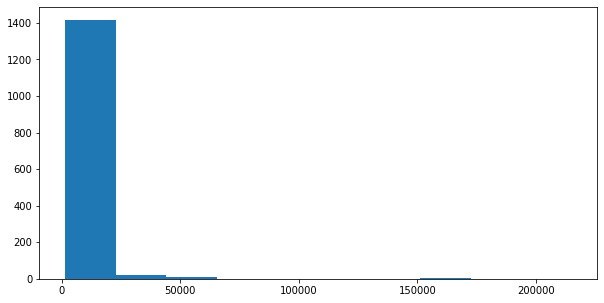

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(train_data.loc[:, 'LotArea'])
plt.show()

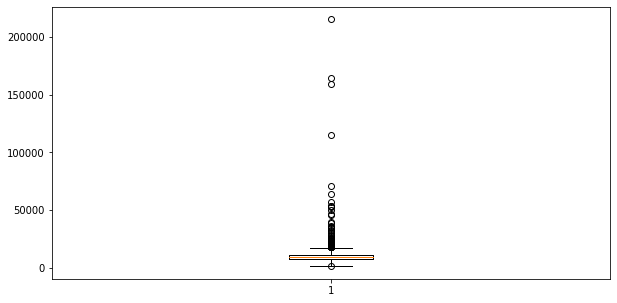

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(train_data.loc[:, 'LotArea'])
plt.show()

In [ ]:
train_data = train_data.loc[train_data.loc[:, 'LotArea'] < 100000]

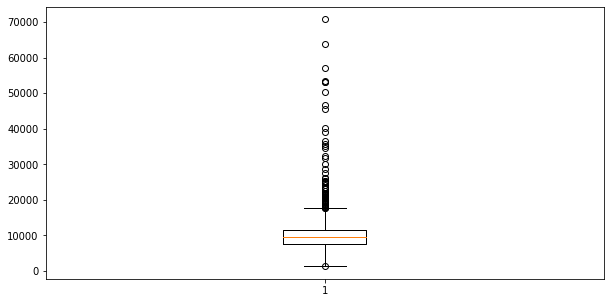

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(train_data.loc[:, 'LotArea'])
plt.show()

In [ ]:
def fill_na(data, column):
  data.loc[data.loc[:, column].isna(), column] = 'Unknown'
  return data

In [ ]:
train_data = fill_na(train_data, 'FireplaceQu')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
train_data.loc[:, 'FireplaceQu'].value_counts()

Unknown    686
Gd         376
TA         309
Fa          33
Ex          24
Po          20
Name: FireplaceQu, dtype: int64

In [ ]:
def fill_na_float(data, column, value):
  copy_data = data.copy()
  is_na_flag = copy_data.loc[:, column].isna()

  fill_value = 0
  if value == 'mean':
    fill_value = copy_data.loc[:, column].mean()
  else:
    fill_value = value

  copy_data.loc[is_na_flag, column] = fill_value
  return copy_data

In [ ]:
train_data.loc[:, 'LotFrontage'].mean()

69.96314907872697

In [ ]:
train_data = fill_na_float(train_data, 'LotFrontage', 0.0)

In [ ]:
train_data.loc[:, 'HouseStyle'].value_counts()

1Story    719
2Story    442
1.5Fin    152
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [ ]:
train_data = pd.get_dummies(train_data, columns=['HouseStyle'])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1448 non-null   int64  
 1   MSZoning           1448 non-null   object 
 2   LotFrontage        1448 non-null   float64
 3   LotArea            1448 non-null   int64  
 4   Street             1448 non-null   object 
 5   LotShape           1448 non-null   object 
 6   LandContour        1448 non-null   object 
 7   Utilities          1448 non-null   object 
 8   LotConfig          1448 non-null   object 
 9   LandSlope          1448 non-null   object 
 10  Neighborhood       1448 non-null   object 
 11  Condition1         1448 non-null   object 
 12  Condition2         1448 non-null   object 
 13  BldgType           1448 non-null   object 
 14  OverallQual        1448 non-null   int64  
 15  OverallCond        1448 non-null   int64  
 16  YearBuilt          1448 

In [ ]:
X = train_data[['LotFrontage', 'LotArea', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl']]
y = train_data['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.22213033016680794

In [ ]:
model.predict(X)

array([204269.22598404, 179307.33464285, 217459.23229641, ...,
       207177.44791221, 175897.17145768, 179143.40051019])